In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load data
df = pd.read_csv('Access_to_a_Livable_Planet_Dataset.csv')

In [6]:
df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2025,241,174,67,0,0,0,0,87,56,42,0,0,91,150,0
1,Alabama,Clay,2025,239,204,34,1,0,0,0,133,52,32,0,0,0,239,0
2,Alabama,DeKalb,2025,243,191,52,0,0,0,0,93,55,42,0,0,156,87,0
3,Alabama,Elmore,2025,177,172,5,0,0,0,0,64,46,32,0,0,177,0,0
4,Alabama,Etowah,2025,241,153,88,0,0,0,0,87,58,45,0,0,72,169,0


In [7]:
df.shape

(978, 18)

Here are the histograms for the non-zero values of each unhealthy air quality category:

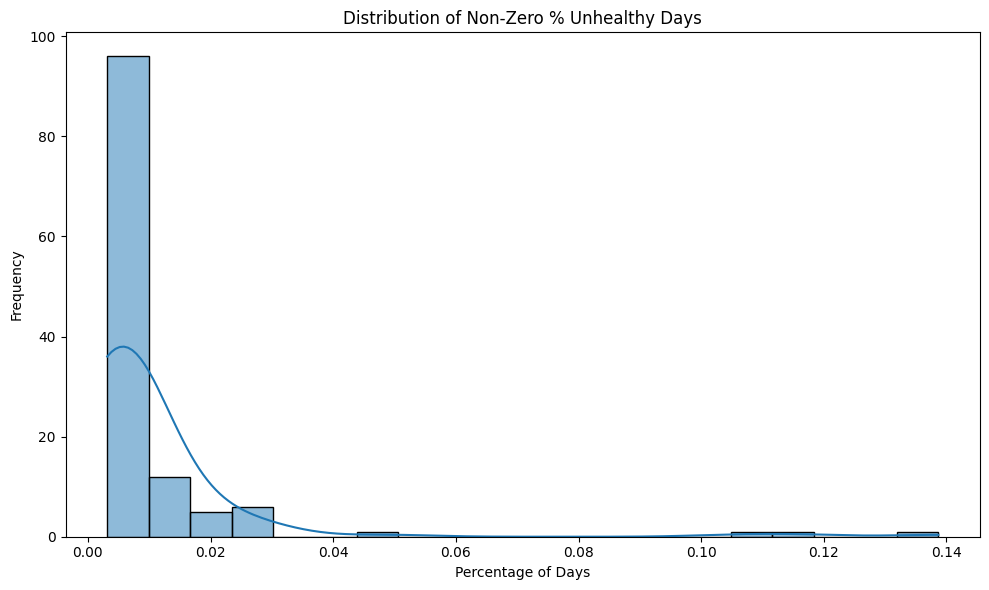

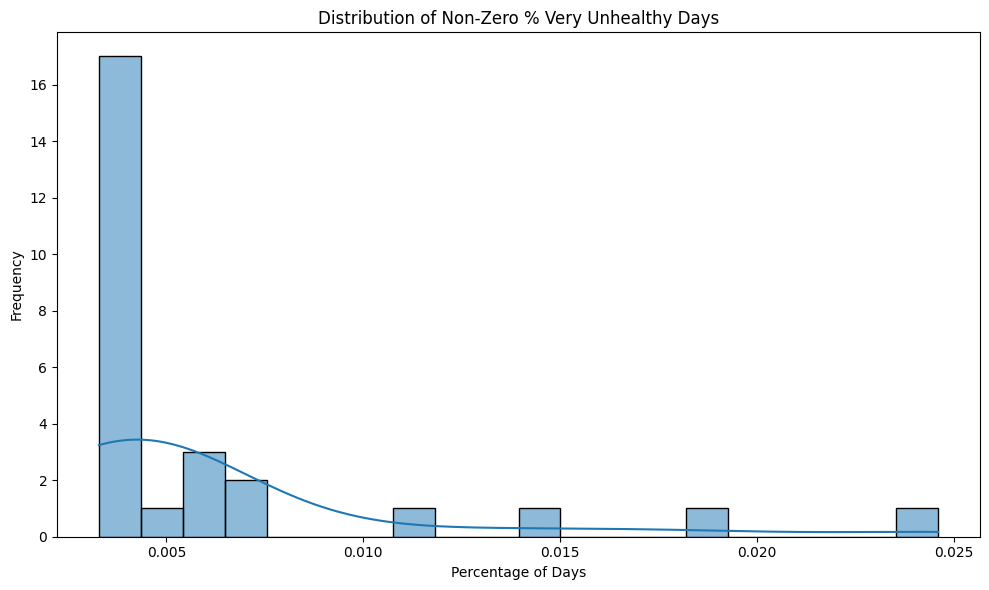

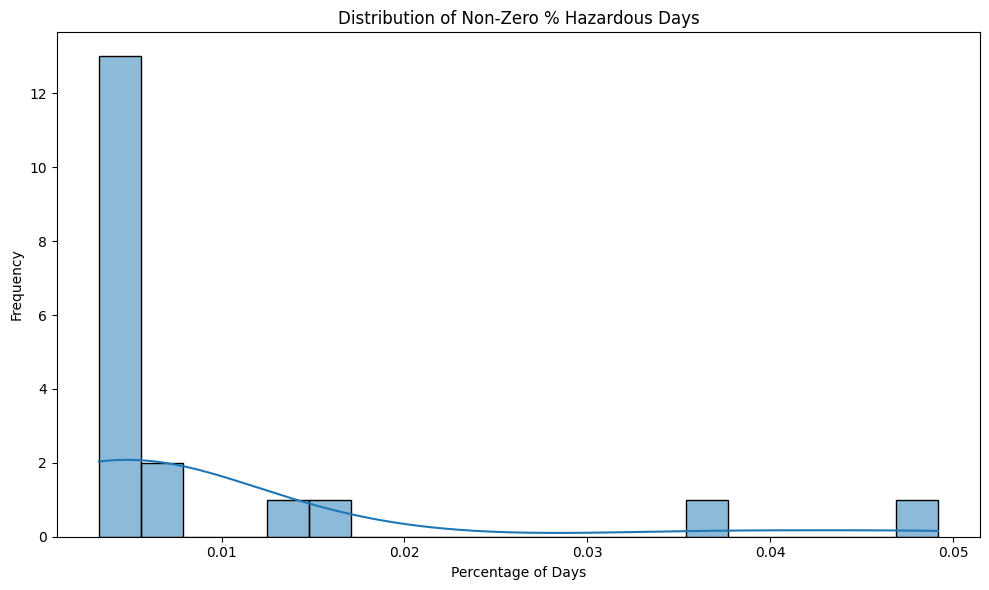

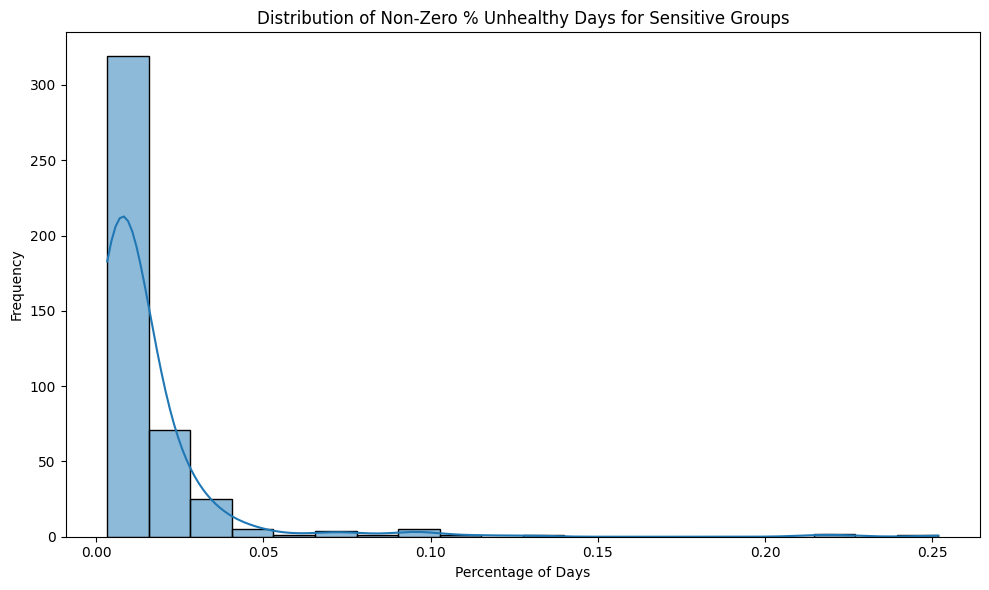

In [26]:
percentage_cols = ['% Unhealthy Days', '% Very Unhealthy Days', '% Hazardous Days', '% Unhealthy Days for Sensitive Groups']

for col in percentage_cols:
    # Filter for non-zero values
    non_zero_values = df[df[col] > 0][col]

    if not non_zero_values.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(non_zero_values, bins=20, kde=True)
        plt.title(f'Distribution of Non-Zero {col}')
        plt.xlabel('Percentage of Days')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No non-zero values to plot for {col}")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                978 non-null    object
 1   County                               978 non-null    object
 2   Year                                 978 non-null    int64 
 3   Days with AQI                        978 non-null    int64 
 4   Good Days                            978 non-null    int64 
 5   Moderate Days                        978 non-null    int64 
 6   Unhealthy for Sensitive Groups Days  978 non-null    int64 
 7   Unhealthy Days                       978 non-null    int64 
 8   Very Unhealthy Days                  978 non-null    int64 
 9   Hazardous Days                       978 non-null    int64 
 10  Max AQI                              978 non-null    int64 
 11  90th Percentile AQI                  978 non-

In [9]:
df.describe()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,978.0,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,2025.0,216.485685,161.377301,53.014315,1.680982,0.328221,0.040900,0.043967,113.176892,57.610429,38.504090,0.767894,1.780164,115.142127,92.556237,6.239264
std,0.0,68.272456,56.851544,42.410648,4.747511,2.019770,0.323688,0.532572,93.492940,14.554052,10.653013,6.809464,13.355379,86.394535,79.511388,29.134426
min,2025.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025.0,181.000000,132.000000,18.000000,0.000000,0.000000,0.000000,0.000000,80.000000,51.000000,36.000000,0.000000,0.000000,33.500000,6.500000,0.000000
50%,2025.0,237.000000,167.000000,42.500000,0.000000,0.000000,0.000000,0.000000,99.000000,58.000000,40.000000,0.000000,0.000000,112.000000,87.500000,0.000000
75%,2025.0,273.000000,203.000000,80.000000,2.000000,0.000000,0.000000,0.000000,126.000000,64.000000,44.000000,0.000000,0.000000,184.000000,155.000000,0.000000
max,2025.0,317.000000,293.000000,223.000000,69.000000,38.000000,6.000000,12.000000,2122.000000,164.000000,90.000000,100.000000,241.000000,304.000000,304.000000,288.000000


In [10]:
# Which counties experience air pollution frequently and severely enough to indicate long-term health risk and warrant intervention?
df['% Unhealthy Days'] = df['Unhealthy Days'] / df['Days with AQI']
df['% Very Unhealthy Days'] = df['Very Unhealthy Days'] / df['Days with AQI']
df['% Hazardous Days'] = df['Hazardous Days'] / df['Days with AQI']
df['% Unhealthy Days for Sensitive Groups'] = df['Unhealthy for Sensitive Groups Days'] / df['Days with AQI']

In [11]:
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,% Unhealthy Days,% Very Unhealthy Days,% Hazardous Days,% Unhealthy Days for Sensitive Groups
0,Alabama,Baldwin,2025,241,174,67,0,0,0,0,...,42,0,0,91,150,0,0.0,0.0,0.0,0.000000
1,Alabama,Clay,2025,239,204,34,1,0,0,0,...,32,0,0,0,239,0,0.0,0.0,0.0,0.004184
2,Alabama,DeKalb,2025,243,191,52,0,0,0,0,...,42,0,0,156,87,0,0.0,0.0,0.0,0.000000
3,Alabama,Elmore,2025,177,172,5,0,0,0,0,...,32,0,0,177,0,0,0.0,0.0,0.0,0.000000
4,Alabama,Etowah,2025,241,153,88,0,0,0,0,...,45,0,0,72,169,0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Wyoming,Sublette,2025,242,165,76,1,0,0,0,...,47,0,0,240,2,0,0.0,0.0,0.0,0.004132
974,Wyoming,Sweetwater,2025,212,149,59,4,0,0,0,...,45,0,0,164,30,18,0.0,0.0,0.0,0.018868
975,Wyoming,Teton,2025,226,179,47,0,0,0,0,...,45,2,0,221,3,0,0.0,0.0,0.0,0.000000
976,Wyoming,Uinta,2025,87,87,0,0,0,0,0,...,10,0,0,0,0,87,0.0,0.0,0.0,0.000000


In [13]:
# compute risk score
df['risk_score'] = df['% Unhealthy Days for Sensitive Groups'] + (2 * df['% Unhealthy Days']) + (3 * df['% Very Unhealthy Days']) + (4 * df['% Hazardous Days'])
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,% Unhealthy Days,% Very Unhealthy Days,% Hazardous Days,% Unhealthy Days for Sensitive Groups,risk_score
0,Alabama,Baldwin,2025,241,174,67,0,0,0,0,...,0,0,91,150,0,0.0,0.0,0.0,0.000000,0.000000
1,Alabama,Clay,2025,239,204,34,1,0,0,0,...,0,0,0,239,0,0.0,0.0,0.0,0.004184,0.004184
2,Alabama,DeKalb,2025,243,191,52,0,0,0,0,...,0,0,156,87,0,0.0,0.0,0.0,0.000000,0.000000
3,Alabama,Elmore,2025,177,172,5,0,0,0,0,...,0,0,177,0,0,0.0,0.0,0.0,0.000000,0.000000
4,Alabama,Etowah,2025,241,153,88,0,0,0,0,...,0,0,72,169,0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Wyoming,Sublette,2025,242,165,76,1,0,0,0,...,0,0,240,2,0,0.0,0.0,0.0,0.004132,0.004132
974,Wyoming,Sweetwater,2025,212,149,59,4,0,0,0,...,0,0,164,30,18,0.0,0.0,0.0,0.018868,0.018868
975,Wyoming,Teton,2025,226,179,47,0,0,0,0,...,2,0,221,3,0,0.0,0.0,0.0,0.000000,0.000000
976,Wyoming,Uinta,2025,87,87,0,0,0,0,0,...,0,0,0,0,87,0.0,0.0,0.0,0.000000,0.000000


Here's a bar chart showing the top 5 counties with the highest risk scores:

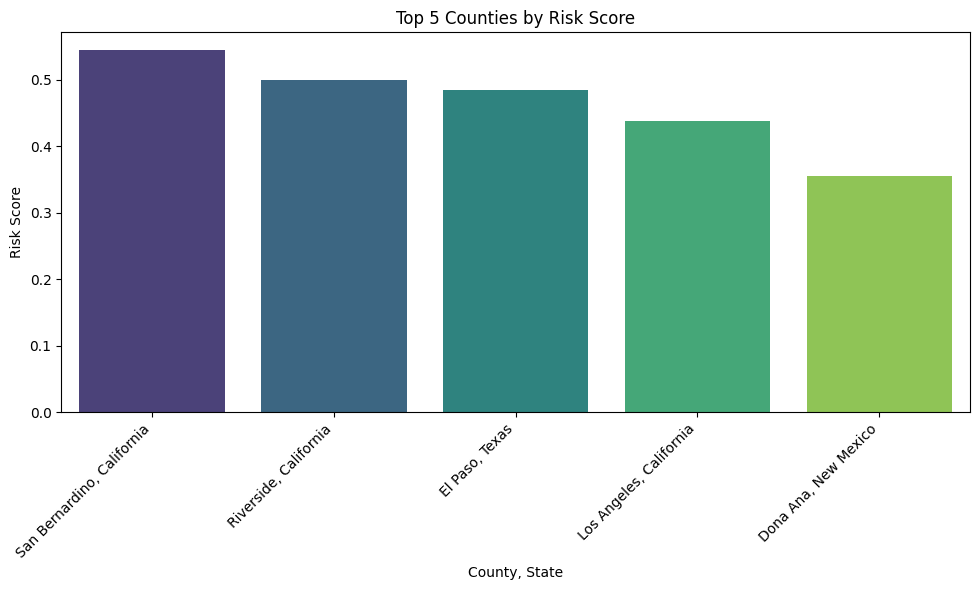

In [27]:
# Get the top 5 counties by risk_score
top_5_counties = df.head(5).copy()

# Create a combined 'County, State' column for better labeling
top_5_counties['County_State'] = top_5_counties['County'] + ', ' + top_5_counties['State']

plt.figure(figsize=(10, 6))
sns.barplot(x='County_State', y='risk_score', data=top_5_counties, palette='viridis', hue='County_State', legend=False)
plt.title('Top 5 Counties by Risk Score')
plt.xlabel('County, State')
plt.ylabel('Risk Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here's the distribution of dominant pollutants in high-priority counties:

In [14]:
# sort risk score in descending order
df = df.sort_values(by='risk_score', ascending=False)
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,% Unhealthy Days,% Very Unhealthy Days,% Hazardous Days,% Unhealthy Days for Sensitive Groups,risk_score
75,California,San Bernardino,2025,274,34,137,61,38,4,0,...,1,1,201,62,9,0.138686,0.014599,0.00000,0.222628,0.543796
72,California,Riverside,2025,274,29,143,69,32,0,1,...,1,0,184,56,33,0.116788,0.000000,0.00365,0.251825,0.500000
804,Texas,El Paso,2025,244,31,155,28,12,6,12,...,1,2,78,49,114,0.049180,0.024590,0.04918,0.114754,0.483607
61,California,Los Angeles,2025,274,30,155,59,29,1,0,...,1,3,172,87,11,0.105839,0.003650,0.00000,0.215328,0.437956
536,New Mexico,Dona Ana,2025,273,53,170,28,7,5,10,...,0,1,117,87,68,0.025641,0.018315,0.03663,0.102564,0.355311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,North Carolina,Haywood,2025,202,177,25,0,0,0,0,...,0,0,184,18,0,0.000000,0.000000,0.00000,0.000000,0.000000
590,North Carolina,Guilford,2025,273,203,70,0,0,0,0,...,0,0,108,164,1,0.000000,0.000000,0.00000,0.000000,0.000000
589,North Carolina,Granville,2025,177,162,15,0,0,0,0,...,0,0,177,0,0,0.000000,0.000000,0.00000,0.000000,0.000000
588,North Carolina,Graham,2025,184,163,21,0,0,0,0,...,0,0,184,0,0,0.000000,0.000000,0.00000,0.000000,0.000000


In [15]:
# categorize the data by high priority, medium priority and low priority
# top 5% is high priority, next 15% is medium priority, the rest is low

n_rows = len(df)
high_priority_count = int(0.05 * n_rows)
medium_priority_count = int(0.15 * n_rows)

df['priority_category'] = 'low priority'
df.iloc[:high_priority_count, df.columns.get_loc('priority_category')] = 'high priority'
df.iloc[high_priority_count : high_priority_count + medium_priority_count, df.columns.get_loc('priority_category')] = 'medium priority'

df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days NO2,Days Ozone,Days PM2.5,Days PM10,% Unhealthy Days,% Very Unhealthy Days,% Hazardous Days,% Unhealthy Days for Sensitive Groups,risk_score,priority_category
75,California,San Bernardino,2025,274,34,137,61,38,4,0,...,1,201,62,9,0.138686,0.014599,0.00000,0.222628,0.543796,high priority
72,California,Riverside,2025,274,29,143,69,32,0,1,...,0,184,56,33,0.116788,0.000000,0.00365,0.251825,0.500000,high priority
804,Texas,El Paso,2025,244,31,155,28,12,6,12,...,2,78,49,114,0.049180,0.024590,0.04918,0.114754,0.483607,high priority
61,California,Los Angeles,2025,274,30,155,59,29,1,0,...,3,172,87,11,0.105839,0.003650,0.00000,0.215328,0.437956,high priority
536,New Mexico,Dona Ana,2025,273,53,170,28,7,5,10,...,1,117,87,68,0.025641,0.018315,0.03663,0.102564,0.355311,high priority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,North Carolina,Haywood,2025,202,177,25,0,0,0,0,...,0,184,18,0,0.000000,0.000000,0.00000,0.000000,0.000000,low priority
590,North Carolina,Guilford,2025,273,203,70,0,0,0,0,...,0,108,164,1,0.000000,0.000000,0.00000,0.000000,0.000000,low priority
589,North Carolina,Granville,2025,177,162,15,0,0,0,0,...,0,177,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,low priority
588,North Carolina,Graham,2025,184,163,21,0,0,0,0,...,0,184,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,low priority


In [16]:
# Among high-priority counties, which pollutants are most frequently present and therefore most likely driving long-term exposure risk?
df['% Days PM2.5'] = df['Days PM2.5'] / df['Days with AQI']
df['% Days Ozone'] = df['Days Ozone'] / df['Days with AQI']
df['% Days NO2'] = df['Days NO2'] / df['Days with AQI']
df['% Days PM10'] = df['Days PM10'] / df['Days with AQI']

In [17]:
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,% Unhealthy Days,% Very Unhealthy Days,% Hazardous Days,% Unhealthy Days for Sensitive Groups,risk_score,priority_category,% Days PM2.5,% Days Ozone,% Days NO2,% Days PM10
75,California,San Bernardino,2025,274,34,137,61,38,4,0,...,0.138686,0.014599,0.00000,0.222628,0.543796,high priority,0.226277,0.733577,0.003650,0.032847
72,California,Riverside,2025,274,29,143,69,32,0,1,...,0.116788,0.000000,0.00365,0.251825,0.500000,high priority,0.204380,0.671533,0.000000,0.120438
804,Texas,El Paso,2025,244,31,155,28,12,6,12,...,0.049180,0.024590,0.04918,0.114754,0.483607,high priority,0.200820,0.319672,0.008197,0.467213
61,California,Los Angeles,2025,274,30,155,59,29,1,0,...,0.105839,0.003650,0.00000,0.215328,0.437956,high priority,0.317518,0.627737,0.010949,0.040146
536,New Mexico,Dona Ana,2025,273,53,170,28,7,5,10,...,0.025641,0.018315,0.03663,0.102564,0.355311,high priority,0.318681,0.428571,0.003663,0.249084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,North Carolina,Haywood,2025,202,177,25,0,0,0,0,...,0.000000,0.000000,0.00000,0.000000,0.000000,low priority,0.089109,0.910891,0.000000,0.000000
590,North Carolina,Guilford,2025,273,203,70,0,0,0,0,...,0.000000,0.000000,0.00000,0.000000,0.000000,low priority,0.600733,0.395604,0.000000,0.003663
589,North Carolina,Granville,2025,177,162,15,0,0,0,0,...,0.000000,0.000000,0.00000,0.000000,0.000000,low priority,0.000000,1.000000,0.000000,0.000000
588,North Carolina,Graham,2025,184,163,21,0,0,0,0,...,0.000000,0.000000,0.00000,0.000000,0.000000,low priority,0.000000,1.000000,0.000000,0.000000


In [18]:
# filter only to high priority
df_high_priority = df[df['priority_category'] == 'high priority']
df_high_priority

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,% Unhealthy Days,% Very Unhealthy Days,% Hazardous Days,% Unhealthy Days for Sensitive Groups,risk_score,priority_category,% Days PM2.5,% Days Ozone,% Days NO2,% Days PM10
75,California,San Bernardino,2025,274,34,137,61,38,4,0,...,0.138686,0.014599,0.000000,0.222628,0.543796,high priority,0.226277,0.733577,0.003650,0.032847
72,California,Riverside,2025,274,29,143,69,32,0,1,...,0.116788,0.000000,0.003650,0.251825,0.500000,high priority,0.204380,0.671533,0.000000,0.120438
804,Texas,El Paso,2025,244,31,155,28,12,6,12,...,0.049180,0.024590,0.049180,0.114754,0.483607,high priority,0.200820,0.319672,0.008197,0.467213
61,California,Los Angeles,2025,274,30,155,59,29,1,0,...,0.105839,0.003650,0.000000,0.215328,0.437956,high priority,0.317518,0.627737,0.010949,0.040146
536,New Mexico,Dona Ana,2025,273,53,170,28,7,5,10,...,0.025641,0.018315,0.036630,0.102564,0.355311,high priority,0.318681,0.428571,0.003663,0.249084
56,California,Imperial,2025,219,60,132,21,6,0,0,...,0.027397,0.000000,0.000000,0.095890,0.150685,high priority,0.210046,0.552511,0.000000,0.237443
28,Arizona,Maricopa,2025,304,50,219,29,4,1,1,...,0.013158,0.003289,0.003289,0.095395,0.144737,high priority,0.121711,0.625000,0.000000,0.253289
32,Arizona,Pinal,2025,268,66,178,20,0,0,4,...,0.000000,0.000000,0.014925,0.074627,0.134328,high priority,0.052239,0.600746,0.000000,0.347015
89,California,Tulare,2025,232,69,133,30,0,0,0,...,0.000000,0.000000,0.000000,0.129310,0.129310,high priority,0.400862,0.594828,0.000000,0.004310
808,Texas,Harris,2025,274,24,223,20,7,0,0,...,0.025547,0.000000,0.000000,0.072993,0.124088,high priority,0.627737,0.295620,0.003650,0.069343


In [19]:
# find the dominant pollutant so the pollutant with highest percentage for each high priority county
pollutant_cols = ['% Days PM2.5', '% Days Ozone', '% Days NO2', '% Days PM10']
df_high_priority['dominant_pollutant'] = df_high_priority[pollutant_cols].idxmax(axis=1).str.replace('% Days ', '')
df_high_priority[['State', 'County', 'risk_score', 'dominant_pollutant'] + pollutant_cols]

/tmp/ipython-input-3325713317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_priority['dominant_pollutant'] = df_high_priority[pollutant_cols].idxmax(axis=1).str.replace('% Days ', '')


,State,County,risk_score,dominant_pollutant,% Days PM2.5,% Days Ozone,% Days NO2,% Days PM10
75,California,San Bernardino,0.543796,Ozone,0.226277,0.733577,0.003650,0.032847
72,California,Riverside,0.500000,Ozone,0.204380,0.671533,0.000000,0.120438
804,Texas,El Paso,0.483607,PM10,0.200820,0.319672,0.008197,0.467213
61,California,Los Angeles,0.437956,Ozone,0.317518,0.627737,0.010949,0.040146
536,New Mexico,Dona Ana,0.355311,Ozone,0.318681,0.428571,0.003663,0.249084
56,California,Imperial,0.150685,Ozone,0.210046,0.552511,0.000000,0.237443
28,Arizona,Maricopa,0.144737,Ozone,0.121711,0.625000,0.000000,0.253289
32,Arizona,Pinal,0.134328,Ozone,0.052239,0.600746,0.000000,0.347015
89,California,Tulare,0.129310,Ozone,0.400862,0.594828,0.000000,0.004310
808,Texas,Harris,0.124088,PM2.5,0.627737,0.295620,0.003650,0.069343


In [20]:
df_high_priority['dominant_pollutant'].value_counts()

,count
dominant_pollutant,
Ozone,35
PM2.5,9
PM10,4


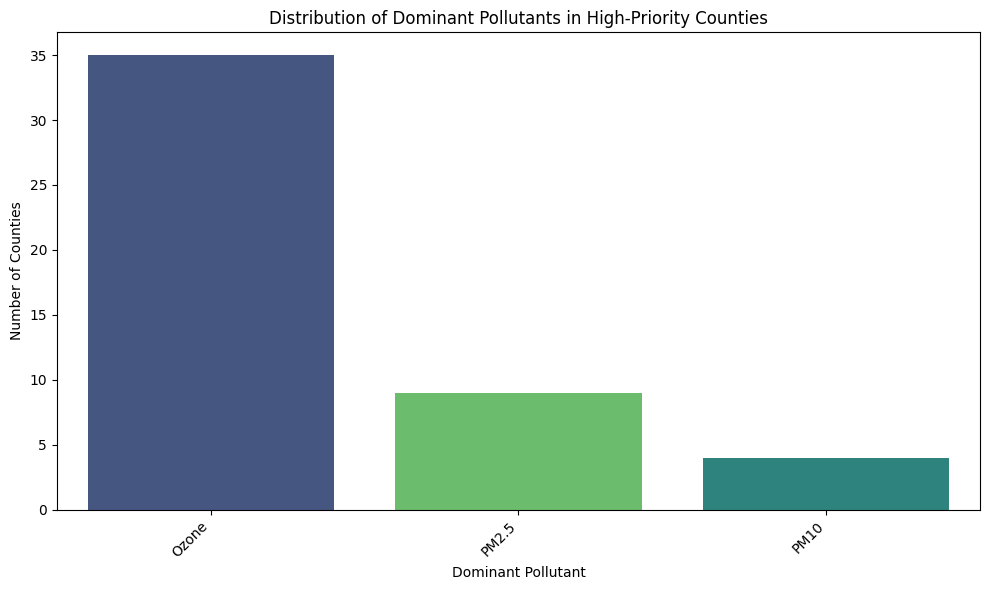

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_high_priority, x='dominant_pollutant', order=df_high_priority['dominant_pollutant'].value_counts().index, palette='viridis', hue='dominant_pollutant', legend=False)
plt.title('Distribution of Dominant Pollutants in High-Priority Counties')
plt.xlabel('Dominant Pollutant')
plt.ylabel('Number of Counties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()